<a href="https://colab.research.google.com/github/Dani2307/Calulator/blob/main/EBPOS_Princ%C3%ADpios_da_IA_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Horas de Estudo  Nota na Prova
0                 1           0.75
1                 1           0.69
2                 1           0.71
3                 3           0.82
4                 3           0.83
5                 4           0.86
6                 5           0.85
7                 5           0.89
8                 5           0.84
9                 6           0.91
10                6           0.92
11                7           0.95


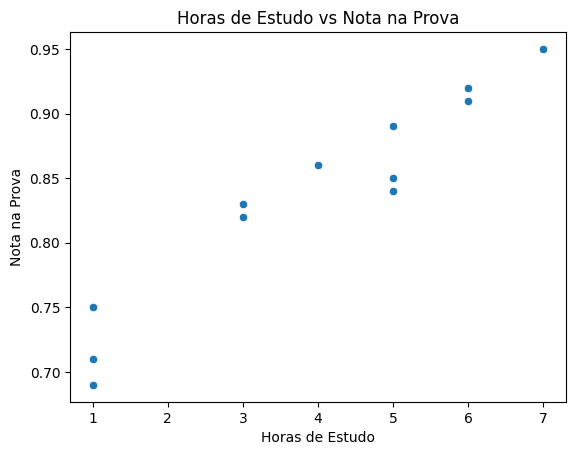

Intercepto (β0): 0.6888756388415671
Coeficiente Angular (β1): 0.03730834752981261


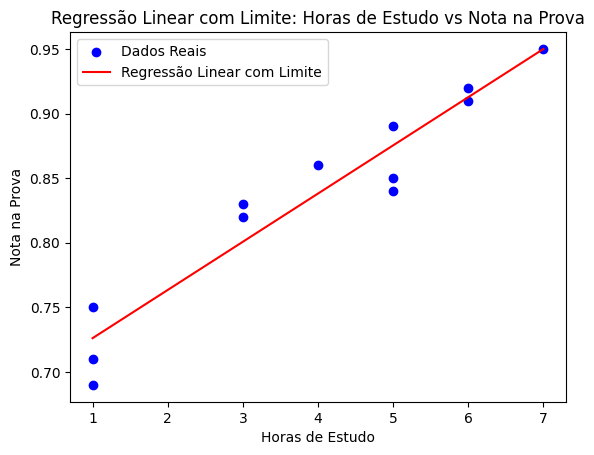

Coeficiente de Determinação (R²): 0.9188628102821593


FloatText(value=4.0, description='Horas de Estudo:')

Button(button_style='success', description='Prever Nota', icon='check', style=ButtonStyle(), tooltip='Clique p…

Estimativa da Nota para 4.0 horas de estudo: 0.8381090289608175


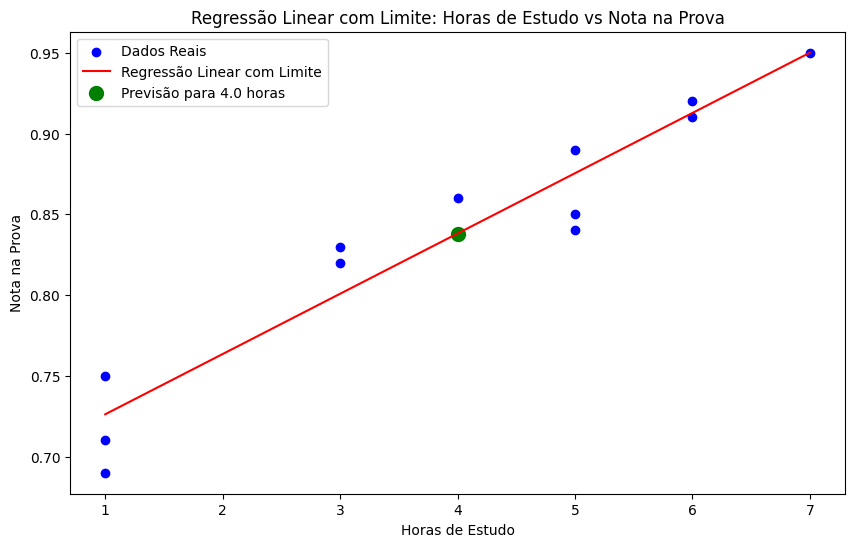

In [ ]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ipywidgets as widgets
from IPython.display import display

# Dados de Horas de Estudo e Notas
horas_estudo = np.array([1, 1, 1, 3, 3, 4, 5, 5, 5, 6, 6, 7])
notas_prova = np.array([0.75, 0.69, 0.71, 0.82, 0.83, 0.86, 0.85, 0.89, 0.84, 0.91, 0.92, 0.95])

# Convertendo para DataFrame para facilitar a visualização
data = pd.DataFrame({'Horas de Estudo': horas_estudo, 'Nota na Prova': notas_prova})

# Visualizando os dados
print(data)
sns.scatterplot(x='Horas de Estudo', y='Nota na Prova', data=data)
plt.title('Horas de Estudo vs Nota na Prova')
plt.show()

# Reshape dos dados
X = horas_estudo.reshape(-1, 1)
y = notas_prova

# Criação do modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente Angular (β1): {beta_1}")

# Predição
y_pred = modelo.predict(X)

# Aplicação dos limites
y_pred_lim = np.clip(y_pred, 0, 1)

# Visualização
plt.scatter(horas_estudo, notas_prova, color='blue', label='Dados Reais')
plt.plot(horas_estudo, y_pred_lim, color='red', label='Regressão Linear com Limite')
plt.title('Regressão Linear com Limite: Horas de Estudo vs Nota na Prova')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota na Prova')
plt.legend()
plt.show()

# Cálculo do R² usando as previsões originais
r_squared = r2_score(y, y_pred)
print(f"Coeficiente de Determinação (R²): {r_squared}")

# Função para realizar a previsão e exibir o resultado
def prever_nota(horas):
    horas_novas = np.array([[horas]])
    nota_prevista = np.clip(modelo.predict(horas_novas), 0, 1)

    print(f"Estimativa da Nota para {horas} horas de estudo: {nota_prevista[0]}")

    # Atualizar o gráfico
    plt.figure(figsize=(10, 6))

    # Dados reais
    plt.scatter(horas_estudo, notas_prova, color='blue', label='Dados Reais')

    # Linha de regressão
    plt.plot(horas_estudo, y_pred_lim, color='red', label='Regressão Linear com Limite')

    # Previsão do usuário
    plt.scatter(horas, nota_prevista, color='green', s=100, label=f'Previsão para {horas} horas')

    plt.title('Regressão Linear com Limite: Horas de Estudo vs Nota na Prova')
    plt.xlabel('Horas de Estudo')
    plt.ylabel('Nota na Prova')
    plt.legend()
    plt.show()

# Caixa de entrada para o usuário digitar a quantidade de horas de estudo
horas_input = widgets.FloatText(
    value=4,
    description='Horas de Estudo:',
    disabled=False
)

# Botão para realizar a previsão
botao_prever = widgets.Button(
    description='Prever Nota',
    disabled=False,
    button_style='success',
    tooltip='Clique para prever a nota',
    icon='check'
)

# Função para atualizar a previsão quando o botão é clicado
def on_button_click(b):
    horas = horas_input.value
    prever_nota(horas)

botao_prever.on_click(on_button_click)

# Exibição dos widgets
display(horas_input, botao_prever)
